
# Investigate a Dataset (TMDb Movie Dataset)

## Table of Contents
<ul>
<li><a style="color:black" href="#intro">Introduction</a></li>
<li><a style="color:black" href="#wrangling">Data Wrangling</a></li>
<li><a style="color:black" href="#eda">Exploratory Data Analysis</a></li>
<li><a style="color:black" href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


>#### The TMDb dataset contains most of the necessary information about a movie like rating, revenue, cast etc.
>> This data helps us to analyze the movies for trends and answer some interesting questions


>### Things explored (<a style="color:black" href="#req1">Questions 1: During years, how are runtime, popularity and average are trending?</a>)
>><ul>
    <li><a style="color:black" href="#runtime">How Runtime is trending over the years</a></li>
    <li><a style="color:black" href="#popularity">How popularity is trending over the years</a></li>
    <li><a style="color:black" href="#revenue">How revenue is trending over the years</a></li>
</ul>

>### Associations explored (<a style="color:black" href="#req2">Question 2: What are some factors that are effecting the revenue of movies</a>)
>><ul>
    <li><a style="color:black" href="#director">Directors and revenue in their movies</a></li>
    <li><a style="color:black" href="#genre">Genre and revenue in those genre movies</a></li>
    <li><a style="color:black" href="#actor">lead actor and revenue in their movies</a></li>
</ul>

<small style="font-size:12px">*Associations and exploration stated are tentative, and the investigation is performed for basic correlation, detailed statistical analysis are yet to be performed.</small>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Loading the data from csv file
tmdb_data = pd.read_csv('data/tmdb-movies.csv')
# check to see how data frame looks like
tmdb_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Info about the data
<ul>
<li>Using head() we were able to see what and observe what exactly are we dealing with here</li>

<li>Now that we can see that there are 21 columns which are already names to access them and the indexex are 0,1,2.</li>
But we can use imdb_id to uniquely identify movies.
</ul>
Lets check for any null or missing values in the datase


#### Replacing the null values with mean values

In [3]:
tmdb_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
mean_data = tmdb_data.mean(skipna=True)

In [5]:
tmdb_data['budget'] = tmdb_data.budget.mask(tmdb_data.budget < 100, mean_data.budget)
tmdb_data['revenue'] = tmdb_data.revenue.mask(tmdb_data.revenue < 100, mean_data.revenue)
tmdb_data['budget_adj'] = tmdb_data.budget_adj.mask(tmdb_data.budget_adj < 100, mean_data.budget_adj)
tmdb_data['revenue_adj'] = tmdb_data.revenue_adj.mask(tmdb_data.revenue_adj < 100, mean_data.revenue_adj)
tmdb_data['runtime'] = tmdb_data.runtime.mask(tmdb_data.runtime < 5, mean_data.runtime)

In [6]:
tmdb_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,2.235447e+07,6.200725e+07,102.661838,217.389748,5.974922,2001.322658,2.682082e+07,7.997260e+07
std,92130.136561,1.000185,2.797925e+07,1.109690e+08,30.415838,575.619058,0.935142,12.812941,3.046746e+07,1.364935e+08
min,5.000000,0.000065,1.080000e+02,1.000000e+02,5.000000,10.000000,1.500000,1960.000000,1.039001e+02,1.141961e+02
25%,10596.250000,0.207583,1.462570e+07,3.982332e+07,90.000000,17.000000,5.400000,1995.000000,1.755104e+07,5.136436e+07
50%,20669.000000,0.383856,1.462570e+07,3.982332e+07,99.000000,38.000000,6.000000,2006.000000,1.755104e+07,5.136436e+07
75%,75610.000000,0.713817,1.500000e+07,3.982332e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,5.136436e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
tmdb_data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning (Removing or droping null imdb_id row)

>From the above code cell we can see some missing data.
>>As the missing information is already padded as NaN and Null numberical values as 0, There is not much of a work is to be done here.<br>
Most of the data that is missing is not relevant for my analysis anyway

We can see that there are 10 imdb_id's that are null, and we don't need those 10 rows with no imdb_id's.

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

tmdb_data.dropna(axis=0, subset=['imdb_id'], inplace=True)
tmdb_data.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7922
director                  40
tagline                 2817
keywords                1487
overview                   3
runtime                    0
genres                    21
production_companies    1025
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning (Removing unwanted columns)

In [9]:
tmdb_data = tmdb_data.drop(['keywords','production_companies','tagline', 'homepage', 'overview'], axis=1)
tmdb_data.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10856 entries, 0 to 10865
Data columns (total 16 columns):
id                10856 non-null int64
imdb_id           10856 non-null object
popularity        10856 non-null float64
budget            10856 non-null float64
revenue           10856 non-null float64
original_title    10856 non-null object
cast              10780 non-null object
director          10816 non-null object
runtime           10856 non-null float64
genres            10835 non-null object
release_date      10856 non-null object
vote_count        10856 non-null int64
vote_average      10856 non-null float64
release_year      10856 non-null int64
budget_adj        10856 non-null float64
revenue_adj       10856 non-null float64
dtypes: float64(7), int64(3), object(6)
memory usage: 1.4+ MB


In [10]:
tmdb_data[tmdb_data.isnull().any(axis=1)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,tt4661600,0.422901,1.462570e+07,3.982332e+07,Sanjay's Super Team,NaN,Sanjay Patel,7.000000,Animation,11/25/15,47,6.9,2015,1.755104e+07,5.136436e+07
424,363869,tt4835298,0.244648,1.462570e+07,3.982332e+07,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100.000000,NaN,10/29/15,21,6.1,2015,1.755104e+07,5.136436e+07
441,355020,tt4908644,0.220751,1.462570e+07,3.982332e+07,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98.000000,Documentary,10/9/15,37,8.2,2015,1.755104e+07,5.136436e+07
465,321109,tt4393514,0.201696,1.462570e+07,3.982332e+07,Bitter Lake,NaN,Adam Curtis,135.000000,Documentary,1/24/15,19,7.8,2015,1.755104e+07,5.136436e+07
532,320996,tt4073952,0.126594,1.462570e+07,3.982332e+07,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,71.000000,Comedy,1/23/15,14,6.6,2015,1.755104e+07,5.136436e+07
536,333350,tt3762974,0.122543,1.462570e+07,3.982332e+07,A Faster Horse,NaN,David Gelb,90.000000,Documentary,10/8/15,12,8.0,2015,1.755104e+07,5.136436e+07
538,224972,tt3983674,0.114264,1.462570e+07,3.982332e+07,The Mask You Live In,NaN,Jennifer Siebel Newsom,88.000000,Documentary,1/1/15,11,8.9,2015,1.755104e+07,5.136436e+07
556,321160,tt3908634,0.100910,1.462570e+07,3.982332e+07,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,105.000000,Comedy|Romance,1/24/15,14,6.5,2015,1.755104e+07,5.136436e+07
587,319091,tt4185572,0.062536,1.462570e+07,3.982332e+07,The Hunting Ground,NaN,Kirby Dick,103.000000,Documentary,2/27/15,39,7.8,2015,1.755104e+07,5.136436e+07
600,332479,tt4550996,0.047256,1.462570e+07,3.982332e+07,Star Wars: TIE Fighter,NaN,Paul Johnson,7.000000,Science Fiction|Action|Animation,3/24/15,29,7.6,2015,1.755104e+07,5.136436e+07


Data is missing in some rows but those are already padded with NaN or 0, so that won't be a problem.


### Data Cleaning (Editing column names)

Renaming release_date as release_month, with only month instead of having date which might be irrelevent for the analysis.

In [11]:
from datetime import datetime as d
def time_change(data):
    return d.strftime(d.strptime(data, "%m/%d/%y"), "%B")

# There is not much of a need with release date exactly, so we will only absorb release month
tmdb_data["release_month"] = tmdb_data["release_date"].apply(time_change)

In [12]:
tmdb_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,June
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,May
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,March
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,December
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,April


<a id='req1'></a>
## Exploratory Data Analysis
<br>
### Research Question 1 
>### During years, how are runtime, popularity and average are trending?

In [13]:
years_data = tmdb_data.groupby("release_year").mean()

>Now we have movies grouped by their respective release_year, now we can answer the question

#### Lets observe how many movies are in each year.

In [14]:
# To get number of movies in each year
movie_year_count = tmdb_data.groupby("release_year").describe()['budget']['count']

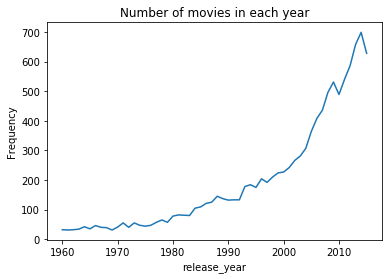

In [15]:
movie_year_count.plot( title='Number of movies in each year')
plt.ylabel("Frequency");

It can be clearly inferred that the number of movies has been increased drastically after 1990

<a id='runtime'></a>
>#### Runtime over the years

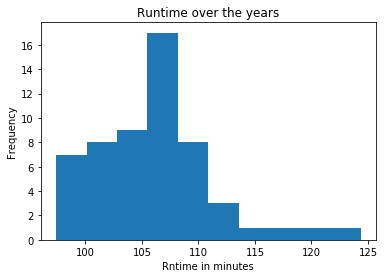

In [16]:
years_data['runtime'].plot.hist()
plt.xlabel("Rntime in minutes")
plt.title("Runtime over the years");

In [17]:
years_data['runtime'].describe()

count     56.000000
mean     106.143784
std        5.318237
min       97.405117
25%      102.120755
50%      105.785868
75%      108.851172
max      124.343750
Name: runtime, dtype: float64

>#### Observation
>><ul><li>It can be observed that the runtime over the years is not much changed and mostly lied between 102 and 108 minutes.</li><li>Distribution is right skewed.</li></ul>


<a id='popularity'></a>
>#### Popularity over the years

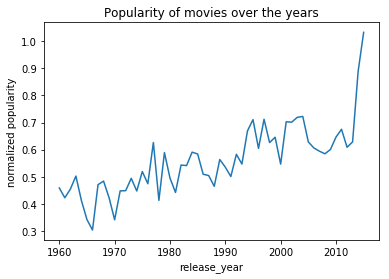

In [18]:
years_data['popularity'].plot()
plt.ylabel('normalized popularity')
plt.title("Popularity of movies over the years");

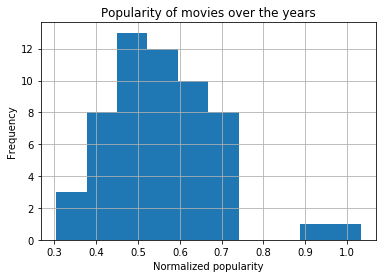

In [19]:
years_data['popularity'].hist(bins=10)
plt.xlabel('Normalized popularity')
plt.ylabel("Frequency")
plt.title("Popularity of movies over the years");

In [20]:
years_data['popularity'].describe()

count    56.000000
mean      0.559691
std       0.128433
min       0.304112
25%       0.469625
50%       0.546928
75%       0.626934
max       1.032126
Name: popularity, dtype: float64

>#### Observations
<ul>
    <li>It can be observed that the popularity for movies has been increasing gradually and there was a sudden rise in popularity for movies after 2010. <b>Rise of social media and promotions through it explains the rise.</b></li>
    <li>The distribution is right skewed</li>
    <li>It is also observed that there are no movies between 0.7 and 0.9 popularity rating which is questionable</li>
</ul>

<a id='revenue'></a>
>### Revenue over the years

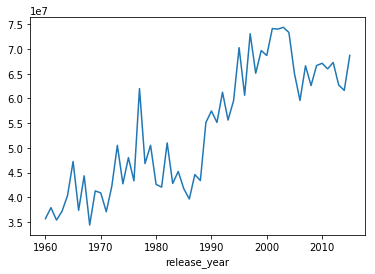

In [21]:
years_data['revenue'].plot();

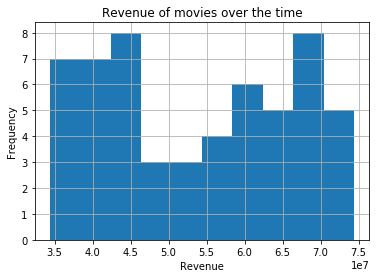

In [22]:
years_data['revenue'].hist()
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.title("Revenue of movies over the time");

In [23]:
pd.set_option('float_format', '{:f}'.format)
years_data['revenue'].describe()

count         56.000000
mean    53746908.783461
std     12647350.408113
min     34358015.754400
25%     42499050.058302
50%     53070665.178745
75%     65339138.993231
max     74422152.605131
Name: revenue, dtype: float64

>#### Observations
<ul>
    <li>The observations that can be inferred are the revenue from movies acquired over the years is mostly concentrated between<br> <b>4.5 billion to 7 billion dollars</b></li>
    <li>The distribution is left skewed.</li>
    <li>It can also be observed that the revenue is increased considerably after 1990.</li>
</ul>

<a id='req2'></a>
### Research Question 2 

>### What are some important factors that are effecting the revenue of movies

<a id='director'></a>
#### How top directors are influencing revenue and who is best?

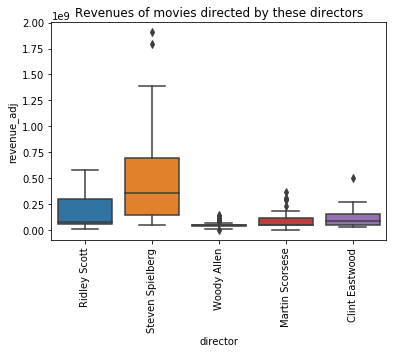

In [24]:
# Getting the directors name who has most movies in their name
dir_5 = tmdb_data['director'].value_counts().sort_values().index[-5:]

# collecting all the movies that are directed by these directors
director_analysis = tmdb_data.loc[(tmdb_data.director.isin(dir_5))]

# Box Plot
bx_plt = sns.boxplot(x='director',y='revenue_adj',data=director_analysis)
bx_plt.set_xticklabels(bx_plt.get_xticklabels(), rotation=90)
bx_plt.set_title("Revenues of movies directed by these directors")
bx_plt.plot();

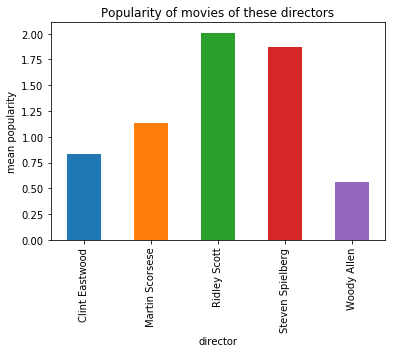

In [25]:
# To see and analyze other variables
d = director_analysis.groupby('director').mean()
d['popularity'].plot(kind='bar', title='Popularity of movies of these directors')
plt.ylabel("mean popularity");

>### Observation
>><ul><li>Steven Spielberg is wearing the crown being  a director to create movies with most revenue than any director</li><li>Ridley Scott is second best director, concering revenue</li><li>It can be observed that the movies of Steven Spielberg and Ridley Scott are ecpected to have high revenue</li><li>Interesting to observe that the popularity for Ridley Scott is more that that of Steven Spielberg movies</li></ul>

<a id='genre'></a>
#### How genre is influencing revenue and which genre is best?

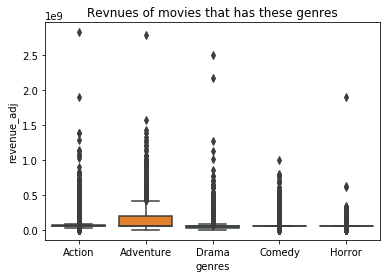

In [26]:
# having a copy of orginal data
genre_data = tmdb_data.copy()

# As genres are seperated by '|' we will split then and consider only the first genre stated there
genre_analysis = genre_data['genres'].str.split('|', expand=True)#[0].value_counts().index[:5]
genre_data['genres'] = genre_data['genres'].str.split('|', expand=True)[0]#.value_counts().index[:5]

# Collecting only the top 5 genres with most frequency in movies
gen_5 = genre_analysis.groupby(0).size().sort_values().index[-5:]

# Movies with genre which has anyone of the most frequent genres
genre_analysis = genre_data.loc[(genre_data.genres.isin(gen_5))]

# Boxplot
bx_plt = sns.boxplot(x='genres',y='revenue_adj',data=genre_analysis)
bx_plt.set_title("Revnues of movies that has these genres")
bx_plt.plot();

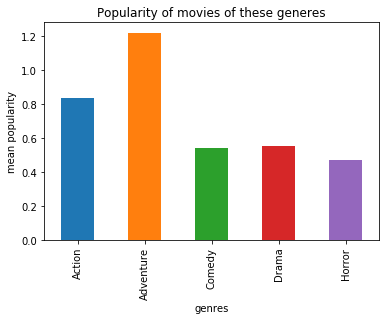

In [27]:
# To see and analyze other variables
d = genre_analysis.groupby('genres').mean()
plt.ylabel("mean popularity")
d['popularity'].plot(kind='bar', title='Popularity of movies of these generes');

>### Observation
>><ul>
    <li>Movies with Adventure as genre is having most revenue than any genre</li>
    <li>Action is second best genre, concering revenue</li><li>To second the first observation, even popularity for adventure movies is higher than any other genre</li>
</ul>

<a id='actor'></a>
#### How lead actor is influencing revenue and which Actor is best, concerning revenues?

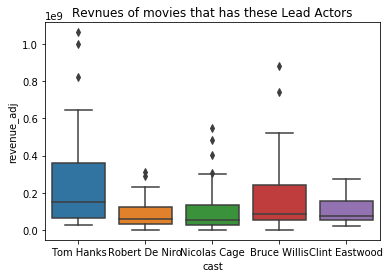

In [28]:
# having a copy of orginal data
cast_data = tmdb_data.copy()

# As casts are seperated by '|' we will split then and consider only the first genre stated there
cast_analysis = cast_data['cast'].str.split('|', expand=True)
cast_data['cast'] = cast_data['cast'].str.split('|', expand=True)

# Collecting only the top 5 genres with most frequency in movies
cast_5 = cast_analysis.groupby(0).size().sort_values().index[-5:]

# Movies with genre which has anyone of the most frequent genres
cast_analysis = cast_data.loc[(cast_data.cast.isin(cast_5))]

# Boxplot
bx_plt = sns.boxplot(x='cast',y='revenue_adj',data=cast_analysis)
bx_plt.set_title("Revnues of movies that has these Lead Actors")
bx_plt.plot();

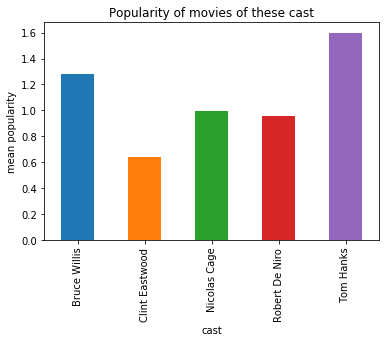

In [29]:
# To see and analyze other variables
d = cast_analysis.groupby('cast').mean()
plt.ylabel("mean popularity")
d['popularity'].plot(kind='bar', title='Popularity of movies of these cast');

>### Observation
>><ul>
    <li>Movies with Tom Hanks as lead actor are having most revenue than any actors</li>
    <li>Bruce Wills is second best actor, concering revenue</li><li>To second the first observation, even popularity for Tom Hanks acted movies is higher than any other actor</li>
</ul>

<a id='conclusions'></a>
## Conclusions


#### As this was only explore and analyze the dataset but not correlating and implying causes, so the conclusions include:
<ul>
    <li><b><a style="color:black" href="#req1">Over the years from 1960 to 2015:</b></a></li>
    <ul>
        <li><a style="color:black" href="#runtime">Runtime has been considerately same and there was not much difference</a></li>
        <li><a style="color:black" href="#popularity">Popularity was increased drastically, this can be explained with advent of social network promotions.</a></li>
        <li><a style="color:black" href="#revenue">Revenue collected from movies has been decreased in recent movies than earlier movies from 1960-1990 period</a></li>
        
    </ul>
     <li><b><a style="color:black" href="#req2">Factors that involved in good revenue in movies</b></a></li>
     <ul>
        <li><a style="color:black" href="#director">Director plays a crucial role in creating a good movie, so Steven Spielberg movies were considered to get good revenue than other directors</a></li>
        <li><a style="color:black" href="#genre">Adventure movies has highest revenue than any other genre</a></li>
        <li><a style="color:black" href="#actor">Movies with Tom Hanks as lead actor got more revenue than any other actor.</a></li>
    </ul>
</ul>
<b>Limitations:</b>
<ul>
    <li>Some of the data is incomplete and replaced by mean, so the analysis is tentative</li>
    <li>The data in dataset may have been collected from various sources and there is no assurance that the data is accurate</li>
    <li>The analysis, exploration and associations investigated are tentative and they can be used for further statistical analysis and correlations</li>
</ul>

### Some more interesting analysis

#### Months to have most number of releases.

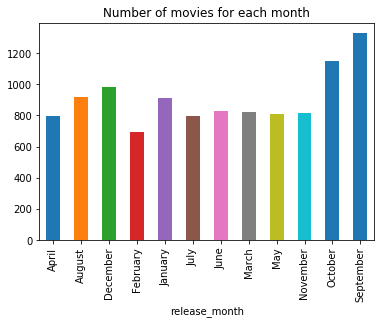

In [30]:
month_analysis =  tmdb_data.groupby("release_month")
month_analysis.describe()['budget']['count'].plot.bar(title="Number of movies for each month")

References:<br>
https://stackoverflow.com was used extensively for many queries in using pandas.<br>
https://pandas.pydata.org was used as documentation reference.